# Test slider graph

interactive(children=(IntSlider(value=0, description='Hoek θ (°)', max=360), Output()), _dom_classes=('widget-…

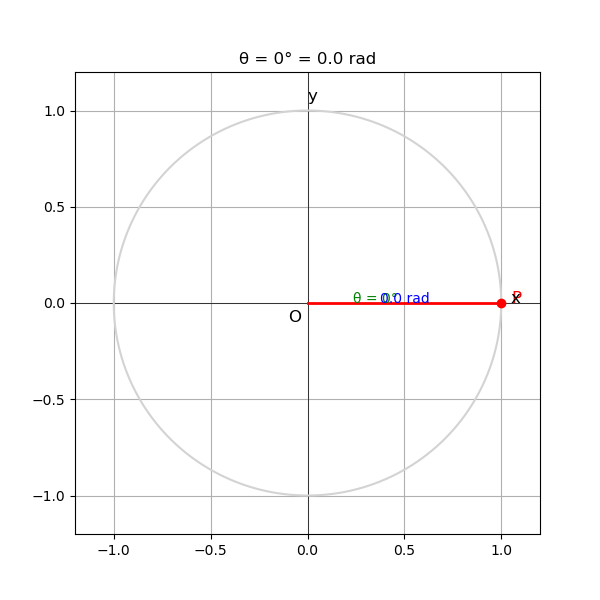

In [ ]:
%pip install ipywidgets

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntSlider, interact
from matplotlib.lines import Line2D



# Voorbereiding van figuur en plots
plt.figure(figsize=(6, 6))
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.title("Eenheidscirkel met hoek θ")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Eenheidscirkel
circle_theta = np.linspace(0, 2 * np.pi, 1000)
circle_x = np.cos(circle_theta)
circle_y = np.sin(circle_theta)
plt.plot(circle_x, circle_y, 'lightgray')


# Lijnen en objecten die we gaan updaten
line_OP, = plt.plot([], [], 'r-', linewidth=2)
arc_line, = plt.plot([], [], 'b--', linewidth=2)
angle_arc, = plt.plot([], [], 'g-', linewidth=1.5)
point_P, = plt.plot([], [], 'ro')

# Teksten die we updaten
text_P = plt.text(0, 0, '', fontsize=12, color='red')
text_deg = plt.text(0, 0, '', fontsize=10, color='green', ha='center')
text_rad = plt.text(0, 0, '', fontsize=10, color='blue', ha='center')

# Extra vaste labels
plt.text(1.05, 0, 'x', fontsize=12)
plt.text(0, 1.05, 'y', fontsize=12)
plt.text(-0.1, -0.1, 'O', fontsize=12)



# Updatefunctie
def update(theta_deg):
    theta_rad = np.radians(theta_deg)
    x = np.cos(theta_rad)
    y = np.sin(theta_rad)

    # Update lijn OP
    line_OP.set_data([0, x], [0, y])

    # Update boog
    arc_theta = np.linspace(0, theta_rad, 300)
    arc_line.set_data(np.cos(arc_theta), np.sin(arc_theta))

    # Hoekboogje
    angle_arc_theta = np.linspace(0, theta_rad, 100)
    angle_arc_r = 0.3
    angle_arc.set_data(angle_arc_r * np.cos(angle_arc_theta),
                       angle_arc_r * np.sin(angle_arc_theta))

    # Punt P
    point_P.set_data([x], [y])
    text_P.set_position((x + 0.05 * np.sign(x), y + 0.05 * np.sign(y)))
    text_P.set_text("P")

    # Hoeklabels
    text_deg.set_position((0.35 * np.cos(theta_rad / 2), 0.35 * np.sin(theta_rad / 2)))
    text_deg.set_text(f"θ = {theta_deg}°")

    text_rad.set_position((0.5 * np.cos(theta_rad / 2), 0.5 * np.sin(theta_rad / 2)))
    text_rad.set_text(f"{round(theta_rad, 2)} rad")

    # Titel
    plt.title(f"θ = {theta_deg}° = {round(theta_rad, 2)} rad")

 

# Interactieve slider
interact(update, theta_deg=IntSlider(min=0, max=360, step=1, value=0, description="Hoek θ (°)"));